In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Normalization , Dense , InputLayer
from tensorflow.keras.losses import MeanSquaredError , MeanAbsoluteError , Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.activations import relu

In [116]:
df = pd.read_csv('train.csv')

In [117]:
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [118]:
df.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [119]:
# sns.pairplot(df[['years', 'km', 'rating',
#        'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']], diag_kind = 'kde')

In [120]:
df = tf.constant(df)
df = tf.cast(df, tf.float32)

print(df)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [121]:
df = tf.random.shuffle(df)
print(df)

tf.Tensor(
[[5.000000e+02 5.114870e+05 8.498440e+05 ... 7.300000e+01 7.800000e+01
  3.158415e+05]
 [4.000000e+01 6.694140e+05 8.257230e+05 ... 5.000000e+01 9.000000e+01
  2.509550e+05]
 [4.100000e+01 5.959670e+05 8.730680e+05 ... 8.400000e+01 7.900000e+01
  3.975220e+05]
 ...
 [8.720000e+02 6.606650e+05 8.429670e+05 ... 1.150000e+02 1.350000e+02
  3.990555e+05]
 [7.570000e+02 6.338370e+05 7.764690e+05 ... 7.200000e+01 1.250000e+02
  4.468750e+05]
 [1.400000e+02 6.389460e+05 7.932150e+05 ... 6.600000e+01 8.800000e+01
  1.148600e+05]], shape=(1000, 12), dtype=float32)


In [122]:
X = df[:,3:-1]
X.shape

TensorShape([1000, 8])

In [123]:
y = df[: , -1]
y = tf.expand_dims(y , axis = -1)
y.shape

TensorShape([1000, 1])

In [124]:
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

dataset_length = len(X)

In [125]:
X_train = X[:int(dataset_length *  train_ratio)]
y_train = y[:int(dataset_length *  train_ratio)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [126]:
X_val = X[int(dataset_length *  train_ratio):int(dataset_length * ( train_ratio +val_ratio))]
y_val = y[int(dataset_length *  train_ratio):int(dataset_length * ( train_ratio +val_ratio))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [127]:
X_test= X[int(dataset_length * ( train_ratio +val_ratio)):]
y_test = y[int(dataset_length * ( train_ratio +val_ratio)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [128]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X_train)

<tf.Tensor: shape=(800, 8), dtype=float32, numpy=
array([[-1.4948224 , -0.29901215, -1.4025791 , ...,  1.5109267 ,
        -0.5655256 , -1.1995573 ],
       [-0.32527903,  0.80329037,  0.02226316, ..., -0.38823715,
        -1.6947354 , -0.6303722 ],
       [ 0.25949264, -0.539262  ,  1.4471053 , ..., -0.49089465,
        -0.02546874, -1.1521252 ],
       ...,
       [-0.9100507 ,  1.2695216 , -0.69015795, ...,  0.48435166,
        -0.17275698, -0.7726685 ],
       [ 1.429036  ,  1.5899583 ,  0.02226316, ..., -0.18292212,
        -0.4182374 ,  1.1720474 ],
       [ 1.429036  ,  1.5223471 ,  1.4471053 , ..., -0.79886717,
        -0.811006  ,  0.22340548]], dtype=float32)>

In [165]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (8,)),
    normalizer,
    Dense(128 , activation = 'relu'),
    Dense(128 , activation = 'relu'),
    Dense(128 , activation = 'relu'),
    Dense(1)
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_13 (Dense)            (None, 128)               1152      
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
______________

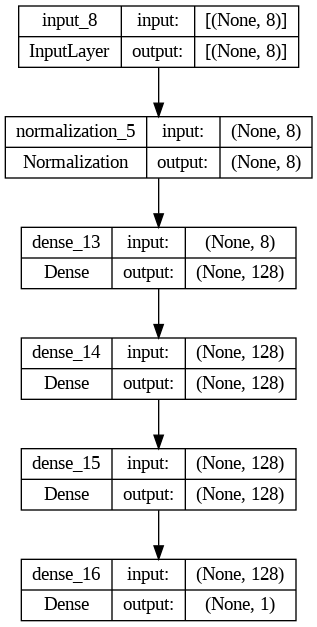

In [166]:
tf.keras.utils.plot_model(model , show_shapes = True)

In [167]:
model.compile(optimizer = Adam( learning_rate= 1),
              loss= MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

In [168]:
history = model.fit(X_train,y_train, validation_data= (X_val , y_val),   epochs = 100 , verbose = 1)

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 296879.5000 - root_mean_squared_error: 325595.3750 - val_loss: 197830.5781 - val_root_mean_squared_error: 237771.3125
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 104926.9922 - root_mean_squared_error: 133288.6250 - val_loss: 70732.5938 - val_root_mean_squared_error: 86437.7969
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 54869.5781 - root_mean_squared_error: 68266.0391 - val_loss: 48512.1602 - val_root_mean_squared_error: 59420.9688
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 56419.9961 - root_mean_squared_error: 71246.5938 - val_loss: 59637.0352 - val_root_mean_squared_error: 69781.6875
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 53155.2305 - root_mean_squared_error: 66377.5234 - val_loss: 48967.6406 - val_root_mean_squared_error: 60523.3867
Epoch 6/100
25/25 [==============================] - 0s 5m

In [169]:
import matplotlib.pyplot as plt

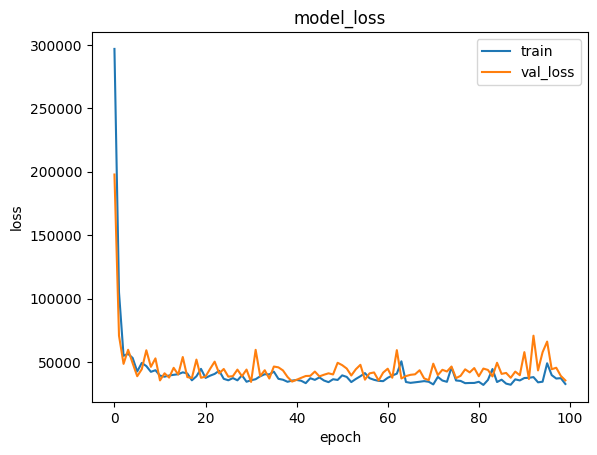

In [170]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train' ,'val_loss'])
plt.show()

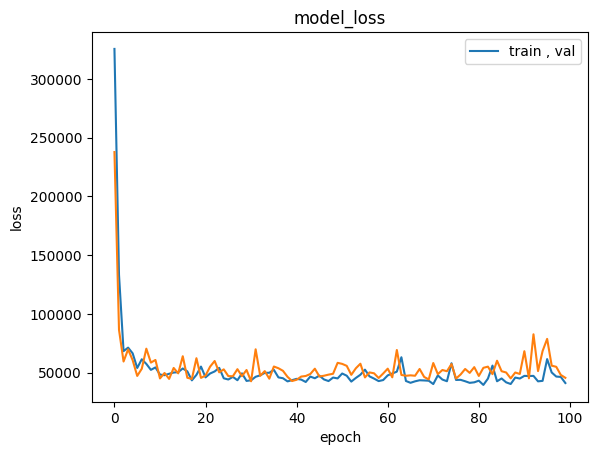

In [173]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])

plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train , val'])
plt.show()

In [174]:
model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


array([[227926.81 ],
       [560737.9  ],
       [384595.56 ],
       [163542.58 ],
       [372243.12 ],
       [464095.3  ],
       [447540.97 ],
       [434988.44 ],
       [476022.06 ],
       [498249.56 ],
       [173001.94 ],
       [269110.4  ],
       [304843.66 ],
       [435898.88 ],
       [184785.08 ],
       [419588.16 ],
       [514406.1  ],
       [121161.88 ],
       [306364.78 ],
       [406847.   ],
       [427705.   ],
       [506031.6  ],
       [263125.44 ],
       [332270.78 ],
       [237227.3  ],
       [391034.7  ],
       [113723.625],
       [310814.5  ],
       [530952.   ],
       [373394.28 ],
       [505745.8  ],
       [242383.62 ],
       [369943.66 ],
       [147179.17 ],
       [266419.7  ],
       [148531.9  ],
       [290222.28 ],
       [464084.47 ],
       [184383.6  ],
       [152005.45 ],
       [215343.61 ],
       [476453.72 ],
       [322335.06 ],
       [511286.97 ],
       [457832.62 ],
       [289936.22 ],
       [ 78572.914],
       [51481

In [175]:
model.predict(tf.expand_dims(X_test[0] , axis = 0))

1/1 [==============================] - 0s 29ms/step


array([[227926.78]], dtype=float32)

In [176]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([247277.5], dtype=float32)>

In [177]:
y_true = list(y_test[: , 0])
y_pred = list(model.predict(X_test)[:,0])

4/4 [==============================] - 0s 3ms/step


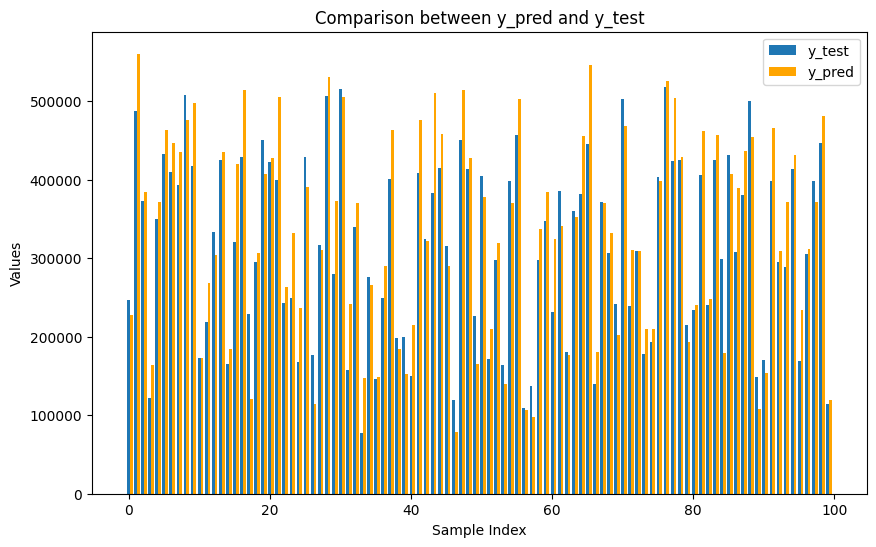

In [178]:






bar_width = 0.4
index = np.arange(100)

plt.figure(figsize=(10, 6))
bar1 = plt.bar(index, y_true,  bar_width, label='y_test')
bar2 = plt.bar(index + bar_width, y_pred, bar_width, label='y_pred', color='orange')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Comparison between y_pred and y_test')
plt.legend()

# Show the plot
plt.show()